# **Artificial Neural Network Mini Project**
- Neural Network with Backpropagation (MLP-BP) vs Neural Network with ELM (ELM)
 - BP Neural Network (tanh-sigmoid)
 - BR Neural Network (sigmoid-sidmoid)
 - Extream Learning Machine Neural Network
- Classification in Iris dataset (from [Scikit Learn Library](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html))
- Implement with Numpy, Matplotlib, Pandas
 - Model
   - **Numpy** for model construction
 - Visualization
   - **Matplotlib** for graph visualization
   - **Pandas** for table visualization
- 30 runs in MLP-BP
- Compare final MSE in MLP-BP and ELM
 - Accuaracy for Correctness measurement
 - Mean Square Error (MSE) for Error measurement
- Techniques
 - map data to range \[0, 1\]

In [ ]:
# Compare ELM MSE and final Backpropagation MSE.
# Find Accuracy MLP-BP/ ELP.
# Compare Accuracy MLP-BP/ ELP.

import numpy as np
import numpy.matlib as matlib

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline


# import iris data
# dataset is also be an numpy array object.
iris = datasets.load_iris()
x_train = iris.data
y_train = iris.target

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
y_train_onehot = np.eye(np.max(y_train) + 1)[y_train]

# data description
data_size = np.size(x_train, axis=0)
data_feature_size = np.size(x_train, axis=1)
target_feature_size = np.size(y_train_onehot, axis=1)

# swap data
swap_idx = np.random.permutation(data_size)
x_train = x_train[swap_idx]
y_train = y_train[swap_idx]
y_train_onehot = y_train_onehot[swap_idx]

In [ ]:
# Activation Function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def mse(A, B):
  return (np.square(np.sum(A - B, axis=1))).mean(axis=0)

In [ ]:
# Build neural network
# Build neural network
def mlp_sigmoid(n=0.01, hidden_node_size=10, max_iter = 500):
  # model structure.
  wi = np.random.rand(data_feature_size, hidden_node_size)
  bi = np.random.rand(1, hidden_node_size)
  wo = np.random.rand(hidden_node_size, target_feature_size)
  bo = np.random.rand(1, target_feature_size)

  mse_temp = np.zeros(max_iter)
  acc_temp = np.zeros(max_iter)

  # Training model with backpropagation learning rule.
  for iter in range(max_iter):
    for data_idx in range(data_size):
      data_point = x_train[data_idx, :].reshape(1, -1)
      
      h = sigmoid(data_point @ wi + bi)
      y = sigmoid(h @ wo + bo)

      e = y_train_onehot[data_idx, :].reshape(1, -1) - y

      dy = e * y * (1-y)
      dh = h * (1-h) * (dy @ wo.T)

      wo = wo + n * h.T @ dy
      bo = bo + n * dy
      wi = wi + n * data_point.T @ dh
      bi = bi + n * dh

    # Evaluate in each iteration
    h = sigmoid(x_train @ wi + matlib.repmat(bi, data_size, 1))
    y = sigmoid(h @ wo + matlib.repmat(bo, data_size, 1))

    predict = np.argmax(y, axis=1).reshape(1, -1)
    acc = (y_train == predict).sum() / data_size

    mse_temp[iter] = mse(y_train_onehot, y)
    acc_temp[iter] = acc
    
  return mse_temp, acc_temp

In [ ]:
# Build neural network
def mlp_tanh(n=0.01, hidden_node_size=10, max_iter = 500):
  # model structure.
  wi = np.random.rand(data_feature_size, hidden_node_size)
  bi = np.random.rand(1, hidden_node_size)
  wo = np.random.rand(hidden_node_size, target_feature_size)
  bo = np.random.rand(1, target_feature_size)

  mse_temp = np.zeros(max_iter)
  acc_temp = np.zeros(max_iter)

  # Training model with backpropagation learning rule.
  for iter in range(max_iter):
    for data_idx in range(data_size):
      data_point = x_train[data_idx, :].reshape(1, -1)
      
      h = np.tanh(data_point @ wi + bi)
      y = sigmoid(h @ wo + bo)

      e = y_train_onehot[data_idx, :].reshape(1, -1) - y

      dy = e * y * (1-y)
      dh = (1-h**2) * (dy @ wo.T)

      wo = wo + n * h.T @ dy
      bo = bo + n * dy
      wi = wi + n * data_point.T @ dh
      bi = bi + n * dh

    # Evaluate in each iteration
    h = np.tanh(x_train @ wi + matlib.repmat(bi, data_size, 1))
    y = sigmoid(h @ wo + matlib.repmat(bo, data_size, 1))

    predict = np.argmax(y, axis=1).reshape(1, -1)
    acc = (y_train == predict).sum() / data_size

    mse_temp[iter] = mse(y_train_onehot, y)
    acc_temp[iter] = acc
    
  return mse_temp, acc_temp

In [ ]:
# run MLP 30 runs
runs = 30
max_iter = 500;
mse_tanh001_temp = np.zeros((runs, max_iter))
mse_sigmoid001_temp = np.zeros((runs, max_iter))
acc_tanh001_temp = np.zeros((runs, max_iter))
acc_sigmoid001_temp = np.zeros((runs, max_iter))

mse_tanh01_temp = np.zeros((runs, max_iter))
mse_sigmoid01_temp = np.zeros((runs, max_iter))
acc_tanh01_temp = np.zeros((runs, max_iter))
acc_sigmoid01_temp = np.zeros((runs, max_iter))

mse_tanh1_temp = np.zeros((runs, max_iter))
mse_sigmoid1_temp = np.zeros((runs, max_iter))
acc_tanh1_temp = np.zeros((runs, max_iter))
acc_sigmoid1_temp = np.zeros((runs, max_iter))

for run_idx in range(runs):
  mse_tanh001_temp[run_idx, :], acc_tanh001_temp[run_idx, :] = mlp_tanh(n=0.001, max_iter=max_iter)
  mse_sigmoid001_temp[run_idx, :], acc_sigmoid001_temp[run_idx, :] = mlp_sigmoid(n=0.001, max_iter=max_iter)

  mse_tanh01_temp[run_idx, :], acc_tanh01_temp[run_idx, :] = mlp_tanh(n=0.01, max_iter=max_iter)
  mse_sigmoid01_temp[run_idx, :], acc_sigmoid01_temp[run_idx, :] = mlp_sigmoid(n=0.01, max_iter=max_iter)

  mse_tanh1_temp[run_idx, :], acc_tanh1_temp[run_idx, :] = mlp_tanh(n=0.1, max_iter=max_iter)
  mse_sigmoid1_temp[run_idx, :], acc_sigmoid1_temp[run_idx, :] = mlp_sigmoid(n=0.1, max_iter=max_iter)


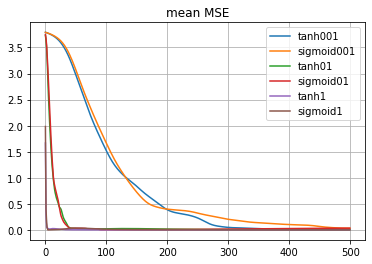

In [ ]:
# Plot MSE

mse_tanh001_mean = np.mean(mse_tanh001_temp, axis=0)
mse_sigmoid001_mean = np.mean(mse_sigmoid001_temp, axis=0)

mse_tanh01_mean = np.mean(mse_tanh01_temp, axis=0)
mse_sigmoid01_mean = np.mean(mse_sigmoid01_temp, axis=0)

mse_tanh1_mean = np.mean(mse_tanh1_temp, axis=0)
mse_sigmoid1_mean = np.mean(mse_sigmoid1_temp, axis=0)

x = np.arange(max_iter)

plt.plot(x, mse_tanh001_mean, label="tanh001")
plt.plot(x, mse_sigmoid001_mean, label="sigmoid001")

plt.plot(x, mse_tanh01_mean, label="tanh01")
plt.plot(x, mse_sigmoid01_mean, label="sigmoid01")

plt.plot(x, mse_tanh1_mean, label="tanh1")
plt.plot(x, mse_sigmoid1_mean, label="sigmoid1")

plt.title('mean MSE')
plt.grid(True)
plt.legend()

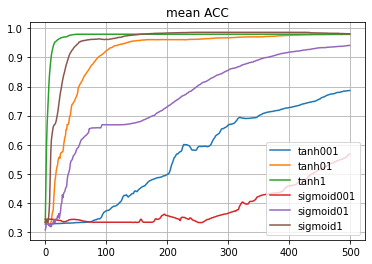

In [ ]:
# Plot mean acc

acc_tanh001_mean = np.mean(acc_tanh001_temp, axis=0)
acc_sigmoid001_mean = np.mean(acc_sigmoid001_temp, axis=0)

acc_tanh01_mean = np.mean(acc_tanh01_temp, axis=0)
acc_sigmoid01_mean = np.mean(acc_sigmoid01_temp, axis=0)

acc_tanh1_mean = np.mean(acc_tanh1_temp, axis=0)
acc_sigmoid1_mean = np.mean(acc_sigmoid1_temp, axis=0)

plt.plot(x, acc_tanh001_mean, label="tanh001")
plt.plot(x, acc_tanh01_mean, label="tanh01")
plt.plot(x, acc_tanh1_mean, label="tanh1")

plt.plot(x, acc_sigmoid001_mean, label="sigmoid001")
plt.plot(x, acc_sigmoid01_mean, label="sigmoid01")
plt.plot(x, acc_sigmoid1_mean, label="sigmoid1")

plt.title('mean ACC')
plt.grid(True)
plt.legend()

In [ ]:
# ELM-Sigmoid
# model params
def elm_sigmoid(hidden_node_size=10):
  # Initialization model & Training
  # hidden layer weight
  elm_hidden_w = wi = np.random.rand(data_feature_size, hidden_node_size)
  elm_hidden_bias_w = np.random.rand(1, hidden_node_size)

  # output layer weight
  elm_output_w = np.dot(np.linalg.pinv(sigmoid(x_train @ elm_hidden_w + matlib.repmat(elm_hidden_bias_w, data_size, 1))), y_train_onehot)

  # Evaluation model
  predict = np.argmax(np.dot(sigmoid(x_train @ elm_hidden_w + matlib.repmat(elm_hidden_bias_w, data_size, 1)) , elm_output_w), axis=1)
  mse_val = mse(y_train_onehot, np.dot(sigmoid(x_train @ elm_hidden_w + matlib.repmat(elm_hidden_bias_w, data_size, 1)) , elm_output_w))

  acc_val = (y_train == predict).sum() / data_size

  return mse_val, acc_val

In [ ]:
# ELM-TanH
# model params
def elm_tanh(hidden_node_size=10):
  # Initialization model & Training
  # hidden layer weight
  elm_hidden_w = wi = np.random.rand(data_feature_size, hidden_node_size)
  elm_hidden_bias_w = np.random.rand(1, hidden_node_size)

  # output layer weight
  elm_output_w = np.dot(np.linalg.pinv(np.tanh(x_train @ elm_hidden_w + matlib.repmat(elm_hidden_bias_w, data_size, 1))), y_train_onehot)

  # Evaluation model
  predict = np.argmax(np.dot(np.tanh(x_train @ elm_hidden_w + matlib.repmat(elm_hidden_bias_w, data_size, 1)) , elm_output_w), axis=1)
  mse_val = mse(y_train_onehot, np.dot(np.tanh(x_train @ elm_hidden_w + matlib.repmat(elm_hidden_bias_w, data_size, 1)) , elm_output_w))

  acc_val = (y_train == predict).sum() / data_size

  return mse_val, acc_val

In [ ]:
acc_elm_tanh_temp = np.zeros((runs,1))
acc_elm_sigmoid_temp = np.zeros((runs, 1))

mse_elm_tanh_temp = np.zeros((runs,1))
mse_elm_sigmoid_temp = np.zeros((runs, 1))

for run_idx in range(runs):
  mse_elm_sigmoid_temp[run_idx], acc_elm_sigmoid_temp[run_idx] = elm_sigmoid()
  mse_elm_tanh_temp[run_idx], acc_elm_tanh_temp[run_idx] = elm_tanh()

In [ ]:
# Find MSE means
mse_elm_sigmoid_mean = np.mean(mse_elm_sigmoid_temp, axis=0)
mse_elm_tanh_mean = np.mean(mse_elm_tanh_temp, axis=0)

mse_elm = pd.DataFrame(np.array([
                                  [mse_elm_sigmoid_mean[0], mse_elm_tanh_mean[0]]
                                ]),
                          columns= ['mse_elm_sidmoid', 'mse_elm_tanh']
                          )

print('Accuracy of ELM')
mse_elm

Accuracy of ELM


,mse_elm_sidmoid,mse_elm_tanh
0,8.282209e-07,0.000002


In [ ]:
# Find ACC means
acc_elm_sigmoid_mean = np.mean(acc_elm_sigmoid_temp, axis=0)
acc_elm_tanh_mean = np.mean(acc_elm_tanh_temp, axis=0)

acc_elm = pd.DataFrame(np.array([
                                  [acc_elm_sigmoid_mean[0], acc_elm_tanh_mean[0]]
                                ]),
                          columns= ['acc_elm_sidmoid', 'acc_elm_tanh']
                          )

print('Accuracy of ELM')
acc_elm

Accuracy of ELM


,acc_elm_sidmoid,acc_elm_tanh
0,0.967333,0.964444


In [ ]:
# ข้อเสนอ: ควรทดสอบแบบ cross validation เพื่อทดสอบความอ่อนไหวต่อข้อมูลของตัวแบบ
# แต่ในปัญหานี้มุ่งนี้ปัญหาลู่เข้าคำตอบ จึงวิเคราะห์ MSE และ Accuracy
acc_bp_ann = pd.DataFrame(np.array([
                                    [acc_sigmoid1_mean[max_iter-1], acc_tanh1_mean[max_iter-1]], 
                                    [acc_sigmoid01_mean[max_iter-1], acc_tanh01_mean[max_iter-1]], 
                                    [acc_sigmoid001_mean[max_iter-1], acc_tanh001_mean[max_iter-1]]
                                    ]), 
                          columns=['acc_sig_sig', 'acc_tanh_sig'],
                          index=['0.1', '0.01', '0.001']
                          )
print('Final ACC')
print('Max Iteration: {}' .format(max_iter))
acc_bp_ann

Final ACC
Max Iteration: 500


,acc_sig_sig,acc_tanh_sig
0.1,0.981333,0.980000
0.01,0.941333,0.979333
0.001,0.567333,0.786222


In [ ]:
# ข้อเสนอ: ควรทดสอบแบบ cross validation เพื่อทดสอบความอ่อนไหวต่อข้อมูลของตัวแบบ
# แต่ในปัญหานี้มุ่งนี้ปัญหาลู่เข้าคำตอบ จึงวิเคราะห์ MSE และ Accuracy
mse_bp_ann = pd.DataFrame(np.array([
                                    [mse_sigmoid1_mean[max_iter-1], mse_tanh1_mean[max_iter-1]], 
                                    [mse_sigmoid01_mean[max_iter-1], mse_tanh01_mean[max_iter-1]], 
                                    [mse_sigmoid001_mean[max_iter-1], mse_tanh001_mean[max_iter-1]]
                                    ]), 
                          columns=['mse_sig_sig', 'mse_tanh_sig'],
                          index=['0.1', '0.01', '0.001']
                          )
print('Final MSE')
print('Max Iteration: {}' .format(max_iter))
mse_bp_ann

Final MSE
Max Iteration: 500


,mse_sig_sig,mse_tanh_sig
0.1,0.000449,0.000103
0.01,0.033898,0.001855
0.001,0.031977,0.013266
